# Variances
### Import Libraries and Database

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Train_knight.csv')
numeric_data = df.select_dtypes(include=[np.number])

### Transform data
*Standardize, PCA, Variances and Cumulative Variances*

In [2]:

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

pca = PCA()
pca.fit(standardized_data)

variances = pca.explained_variance_ratio_ * 100
cumulative_variances = np.cumsum(variances)

In [3]:
print("Variances (Percentage):")
print(variances)
print("\nCumulative Variances (Percentage):")
print(cumulative_variances)

Variances (Percentage):
[4.42124322e+01 1.83133809e+01 9.86939994e+00 6.44725649e+00
 5.48418978e+00 3.86419671e+00 2.40371418e+00 1.86115266e+00
 1.42841975e+00 1.14635004e+00 1.03990775e+00 9.15659049e-01
 8.25582942e-01 4.49675980e-01 3.24922360e-01 2.80700452e-01
 2.22879421e-01 1.99287079e-01 1.59928087e-01 1.12338278e-01
 1.11953696e-01 8.29193824e-02 7.91693696e-02 5.73407566e-02
 5.14260951e-02 2.68407149e-02 2.06171597e-02 5.70303169e-03
 2.27265764e-03 3.83020159e-04]

Cumulative Variances (Percentage):
[ 44.21243224  62.52581316  72.3952131   78.84246959  84.32665937
  88.19085608  90.59457026  92.45572292  93.88414267  95.03049271
  96.07040047  96.98605952  97.81164246  98.26131844  98.5862408
  98.86694125  99.08982067  99.28910775  99.44903584  99.56137412
  99.67332781  99.75624719  99.83541656  99.89275732  99.94418342
  99.97102413  99.99164129  99.99734432  99.99961698 100.        ]


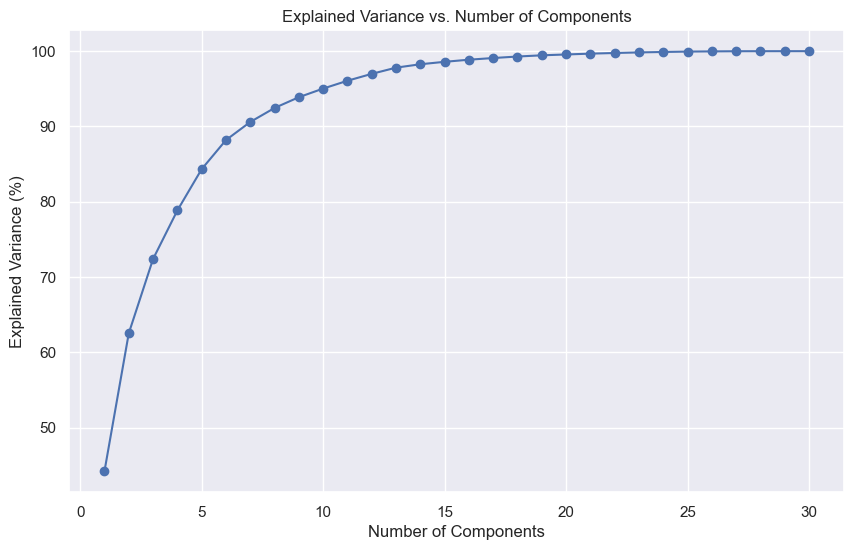

In [5]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [6]:
num_components_needed = np.argmax(cumulative_variances >= 90) + 1
print(f"Number of components needed to reach 90% variance: {num_components_needed}")

Number of components needed to reach 90% variance: 7
